In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from idtxl.bivariate_pid import BivariatePID
from idtxl.data import Data

In [95]:
def bernoulli(n, p):
    return (np.random.uniform(0, 1, n) < p).astype(int)

def gen_discrete_random(nSample, alphaX=0.5, alphaY=0.5, alphaZ=0.5):
    T =   2*bernoulli(nSample, 0.5)
    nuX = 2*bernoulli(nSample, 0.5)
    nuY = 2*bernoulli(nSample, 0.5)
    nuZ = 2*bernoulli(nSample, 0.5)
    aX = bernoulli(nSample, alphaX)
    aY = bernoulli(nSample, alphaY)
    aZ = bernoulli(nSample, alphaZ)
    
    x = (1 - aX)*T + aX*nuX
    y = (1 - aY)*T + aY*nuY
    z = (1 - aZ)*T + aZ*nuZ
    return x,y,z

def shuffle(x):
    x1 = x.copy()
    np.random.shuffle(x1)
    return x1

In [8]:
decompLabels = ['unq_s1', 'unq_s2', 'shd_s1_s2', 'syn_s1_s2']

In [98]:
def pid(dataPS):
    settings = {'pid_estimator': 'TartuPID', 'lags_pid': [0, 0]}

    dataIDTxl = Data(dataPS, dim_order='ps', normalise=False)
    pid = BivariatePID()
    rez = pid.analyse_single_target(settings=settings, data=dataIDTxl, target=2, sources=[0, 1])
    rezTrg = rez.get_single_target(2)

    # Getting rid of negative and very low positive PID's.
    # Statistical tests behave unexplectedly - perhaps low values contaminated by roundoff errors?
#     return {k : np.clip(rezTrg[k], 1.0E-6, None) for k in decompLabels}
    return {k : rezTrg[k] for k in decompLabels}

In [101]:
nDataLst = []
rezLst = []
rezSh = []
for nData in (10**np.linspace(3, 5, 1000)).astype(int):
    x,y,z = gen_discrete_random(nData, alphaX=0.1, alphaY=0.1, alphaZ=0)
    pidRez = pid(np.array([x,y,z]))
    pidSh = pid(np.array([x,y,shuffle(z)]))
    nDataLst += [nData, nData]
    rezLst += [pidRez['unq_s1'], pidRez['unq_s2']]
    rezSh += [pidSh['unq_s1'], pidSh['unq_s2']]

Adding data with properties: 3 processes, 1000 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.06147758
shd information: 0.66084176, syn information: 0.13604833
Adding data with properties: 3 processes, 1000 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00038148
shd information: 0.00005018, syn information: 0.00286858
Adding data with properties: 3 processes, 1004 samples, 1 replications
overwriting existing data

unq information s1: 0.00921323, s2: -0.00000000
shd information: 0.73511899, syn information: 0.16731813
Adding data with properties: 3 processes, 1004 samples, 1 replications
overwriting existing data

unq information s1: 0.00056770, s2: -0.00000000
shd information: 0.00054317, syn information: 0.00020602
Adding data with properties: 3 processes, 1009 samples, 1 replications
overwriting existing data

unq information s1: 0.01953886, s2: -0.00000000
shd information: 0.65501975, syn informati


unq information s1: 0.00878010, s2: 0.02335643
shd information: 0.71803074, syn information: 0.15196903
Adding data with properties: 3 processes, 1153 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00004083
shd information: 0.00000242, syn information: 0.00057557
Adding data with properties: 3 processes, 1158 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.05378848
shd information: 0.71337275, syn information: 0.13175450
Adding data with properties: 3 processes, 1158 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00086149
shd information: 0.00048479, syn information: 0.00065897
Adding data with properties: 3 processes, 1164 samples, 1 replications
overwriting existing data

unq information s1: 0.00428776, s2: 0.01804367
shd information: 0.70364099, syn information: 0.16175706
Adding data with properties: 3 processes, 1164 samples, 1 replications
overwriting e


unq information s1: -0.00000000, s2: 0.01729162
shd information: 0.73383234, syn information: 0.14454138
Adding data with properties: 3 processes, 1324 samples, 1 replications
overwriting existing data

unq information s1: 0.00006030, s2: -0.00000000
shd information: 0.00047529, syn information: 0.00022002
Adding data with properties: 3 processes, 1330 samples, 1 replications
overwriting existing data

unq information s1: 0.01149186, s2: 0.01998097
shd information: 0.66091205, syn information: 0.16293531
Adding data with properties: 3 processes, 1330 samples, 1 replications
overwriting existing data

unq information s1: 0.00003850, s2: -0.00000000
shd information: 0.00000048, syn information: 0.00037153
Adding data with properties: 3 processes, 1336 samples, 1 replications
overwriting existing data

unq information s1: 0.02108907, s2: -0.00000000
shd information: 0.67251204, syn information: 0.17369145
Adding data with properties: 3 processes, 1336 samples, 1 replications
overwriting 


unq information s1: 0.02204551, s2: -0.00000000
shd information: 0.66947239, syn information: 0.16065547
Adding data with properties: 3 processes, 1514 samples, 1 replications
overwriting existing data

unq information s1: 0.00044998, s2: -0.00000000
shd information: 0.00001424, syn information: 0.00101822
Adding data with properties: 3 processes, 1521 samples, 1 replications
overwriting existing data

unq information s1: 0.07551164, s2: -0.00000000
shd information: 0.69956490, syn information: 0.12696152
Adding data with properties: 3 processes, 1521 samples, 1 replications
overwriting existing data

unq information s1: 0.00056297, s2: -0.00000000
shd information: 0.00080440, syn information: 0.00002477
Adding data with properties: 3 processes, 1528 samples, 1 replications
overwriting existing data

unq information s1: 0.00579753, s2: 0.00688275
shd information: 0.70927262, syn information: 0.16396280
Adding data with properties: 3 processes, 1528 samples, 1 replications
overwriting 


unq information s1: 0.03705096, s2: 0.00275920
shd information: 0.69005264, syn information: 0.15177168
Adding data with properties: 3 processes, 1730 samples, 1 replications
overwriting existing data

unq information s1: 0.00067757, s2: -0.00000000
shd information: 0.00045055, syn information: 0.00096709
Adding data with properties: 3 processes, 1738 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.04242186
shd information: 0.70876674, syn information: 0.13483482
Adding data with properties: 3 processes, 1738 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00034613
shd information: 0.00110870, syn information: 0.00002253
Adding data with properties: 3 processes, 1746 samples, 1 replications
overwriting existing data

unq information s1: 0.02461397, s2: -0.00000000
shd information: 0.70940042, syn information: 0.15544203
Adding data with properties: 3 processes, 1746 samples, 1 replications
overwriting 

Adding data with properties: 3 processes, 1960 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00141209
shd information: 0.00087175, syn information: 0.00041655
Adding data with properties: 3 processes, 1969 samples, 1 replications
overwriting existing data

unq information s1: 0.00096363, s2: 0.01609294
shd information: 0.71149565, syn information: 0.15115350
Adding data with properties: 3 processes, 1969 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00005757
shd information: 0.00082064, syn information: 0.00042494
Adding data with properties: 3 processes, 1978 samples, 1 replications
overwriting existing data

unq information s1: 0.04874381, s2: -0.00000000
shd information: 0.69413366, syn information: 0.13723927
Adding data with properties: 3 processes, 1978 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00003164
shd information: 0.00000087, syn informatio


unq information s1: -0.00000000, s2: 0.00347660
shd information: 0.68850490, syn information: 0.17109104
Adding data with properties: 3 processes, 2189 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00060391
shd information: 0.00000848, syn information: 0.00143331
Adding data with properties: 3 processes, 2199 samples, 1 replications
overwriting existing data

unq information s1: 0.02722733, s2: -0.00000000
shd information: 0.68345549, syn information: 0.15830012
Adding data with properties: 3 processes, 2199 samples, 1 replications
overwriting existing data

unq information s1: 0.00000006, s2: -0.00000000
shd information: 0.00000136, syn information: 0.00018095
Adding data with properties: 3 processes, 2209 samples, 1 replications
overwriting existing data

unq information s1: 0.00282058, s2: 0.01427462
shd information: 0.71107770, syn information: 0.14215760
Adding data with properties: 3 processes, 2209 samples, 1 replications
overwriting 


unq information s1: -0.00000000, s2: 0.00000884
shd information: 0.00000195, syn information: 0.00007828
Adding data with properties: 3 processes, 2445 samples, 1 replications
overwriting existing data

unq information s1: 0.01066203, s2: 0.00023128
shd information: 0.71716208, syn information: 0.15292132
Adding data with properties: 3 processes, 2445 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00007304
shd information: 0.00004862, syn information: 0.00004507
Adding data with properties: 3 processes, 2456 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.03620758
shd information: 0.70121525, syn information: 0.14859443
Adding data with properties: 3 processes, 2456 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00024983
shd information: 0.00007614, syn information: 0.00011417
Adding data with properties: 3 processes, 2468 samples, 1 replications
overwriting 


unq information s1: 0.03039663, s2: -0.00000000
shd information: 0.69646940, syn information: 0.15225424
Adding data with properties: 3 processes, 2681 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00010468
shd information: 0.00001704, syn information: 0.00028777
Adding data with properties: 3 processes, 2694 samples, 1 replications
overwriting existing data

unq information s1: 0.00078135, s2: 0.00910650
shd information: 0.71067310, syn information: 0.15774102
Adding data with properties: 3 processes, 2694 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00018374
shd information: 0.00081716, syn information: 0.00007028
Adding data with properties: 3 processes, 2706 samples, 1 replications
overwriting existing data

unq information s1: 0.00227420, s2: 0.00062943
shd information: 0.71820557, syn information: 0.16165054
Adding data with properties: 3 processes, 2706 samples, 1 replications
overwriting e


unq information s1: -0.00000000, s2: 0.00921716
shd information: 0.69502426, syn information: 0.16760896
Adding data with properties: 3 processes, 3195 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00008692
shd information: 0.00009666, syn information: 0.00077963
Adding data with properties: 3 processes, 3210 samples, 1 replications
overwriting existing data

unq information s1: 0.02812075, s2: -0.00000000
shd information: 0.70377684, syn information: 0.15944986
Adding data with properties: 3 processes, 3210 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001485
shd information: 0.00011021, syn information: 0.00132664
Adding data with properties: 3 processes, 3224 samples, 1 replications
overwriting existing data

unq information s1: 0.01990714, s2: -0.00000000
shd information: 0.70988359, syn information: 0.15560126
Adding data with properties: 3 processes, 3224 samples, 1 replications
overwriting

Adding data with properties: 3 processes, 3754 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00064206
shd information: 0.00019648, syn information: 0.00052522
Adding data with properties: 3 processes, 3772 samples, 1 replications
overwriting existing data

unq information s1: 0.02369445, s2: -0.00000000
shd information: 0.70127414, syn information: 0.15727075
Adding data with properties: 3 processes, 3772 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00091008
shd information: 0.00042834, syn information: 0.00023648
Adding data with properties: 3 processes, 3789 samples, 1 replications
overwriting existing data

unq information s1: 0.01257959, s2: 0.00454017
shd information: 0.68752499, syn information: 0.16463129
Adding data with properties: 3 processes, 3789 samples, 1 replications
overwriting existing data

unq information s1: 0.00004966, s2: -0.00000000
shd information: 0.00009218, syn informatio


unq information s1: -0.00000000, s2: 0.03492932
shd information: 0.69081398, syn information: 0.16356303
Adding data with properties: 3 processes, 4331 samples, 1 replications
overwriting existing data

unq information s1: 0.00005197, s2: -0.00000000
shd information: 0.00010145, syn information: 0.00004832
Adding data with properties: 3 processes, 4351 samples, 1 replications
overwriting existing data

unq information s1: 0.01202089, s2: 0.00153973
shd information: 0.72585502, syn information: 0.15373273
Adding data with properties: 3 processes, 4351 samples, 1 replications
overwriting existing data

unq information s1: 0.00035098, s2: -0.00000000
shd information: 0.00021337, syn information: 0.00008710
Adding data with properties: 3 processes, 4371 samples, 1 replications
overwriting existing data

unq information s1: 0.00826274, s2: 0.00167906
shd information: 0.69489958, syn information: 0.17321809
Adding data with properties: 3 processes, 4371 samples, 1 replications
overwriting e


unq information s1: -0.00000000, s2: 0.00603720
shd information: 0.70369730, syn information: 0.16279559
Adding data with properties: 3 processes, 4928 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00011690
shd information: 0.00001171, syn information: 0.00013347
Adding data with properties: 3 processes, 4951 samples, 1 replications
overwriting existing data

unq information s1: 0.03165605, s2: 0.00006841
shd information: 0.70987376, syn information: 0.14105219
Adding data with properties: 3 processes, 4951 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00015976
shd information: 0.00003384, syn information: 0.00021464
Adding data with properties: 3 processes, 4973 samples, 1 replications
overwriting existing data

unq information s1: 0.00001558, s2: 0.02308176
shd information: 0.69950784, syn information: 0.15685339
Adding data with properties: 3 processes, 4973 samples, 1 replications
overwriting e


unq information s1: 0.01208295, s2: 0.00088282
shd information: 0.70860462, syn information: 0.16448243
Adding data with properties: 3 processes, 5555 samples, 1 replications
overwriting existing data

unq information s1: 0.00004548, s2: -0.00000000
shd information: 0.00007357, syn information: 0.00000347
Adding data with properties: 3 processes, 5581 samples, 1 replications
overwriting existing data

unq information s1: 0.00127451, s2: 0.00435366
shd information: 0.72004909, syn information: 0.15806666
Adding data with properties: 3 processes, 5581 samples, 1 replications
overwriting existing data

unq information s1: 0.00004803, s2: -0.00000000
shd information: 0.00001223, syn information: 0.00022063
Adding data with properties: 3 processes, 5607 samples, 1 replications
overwriting existing data

unq information s1: 0.00834657, s2: 0.00899135
shd information: 0.70980420, syn information: 0.15440789
Adding data with properties: 3 processes, 5607 samples, 1 replications
overwriting ex


unq information s1: -0.00000000, s2: 0.00038574
shd information: 0.00023645, syn information: 0.00030138
Adding data with properties: 3 processes, 6234 samples, 1 replications
overwriting existing data

unq information s1: 0.00911313, s2: 0.00440631
shd information: 0.69960822, syn information: 0.16227391
Adding data with properties: 3 processes, 6234 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001562
shd information: 0.00000109, syn information: 0.00002303
Adding data with properties: 3 processes, 6263 samples, 1 replications
overwriting existing data

unq information s1: 0.00376535, s2: 0.00766546
shd information: 0.69779951, syn information: 0.16472344
Adding data with properties: 3 processes, 6263 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00008065
shd information: 0.00008530, syn information: 0.00109898
Adding data with properties: 3 processes, 6292 samples, 1 replications
overwriting e


unq information s1: 0.00045482, s2: 0.00556704
shd information: 0.71340713, syn information: 0.15576116
Adding data with properties: 3 processes, 6899 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00005404
shd information: 0.00017824, syn information: 0.00002473
Adding data with properties: 3 processes, 6931 samples, 1 replications
overwriting existing data

unq information s1: 0.01510839, s2: 0.00587746
shd information: 0.71193616, syn information: 0.14966146
Adding data with properties: 3 processes, 6931 samples, 1 replications
overwriting existing data

unq information s1: 0.00004540, s2: -0.00000000
shd information: 0.00000779, syn information: 0.00039673
Adding data with properties: 3 processes, 6963 samples, 1 replications
overwriting existing data

unq information s1: 0.00784651, s2: -0.00000000
shd information: 0.70338492, syn information: 0.16190007
Adding data with properties: 3 processes, 6963 samples, 1 replications
overwriting e


unq information s1: 0.00006250, s2: -0.00000000
shd information: 0.00011498, syn information: 0.00009163
Adding data with properties: 3 processes, 7636 samples, 1 replications
overwriting existing data

unq information s1: 0.05125018, s2: -0.00000000
shd information: 0.68833302, syn information: 0.13916505
Adding data with properties: 3 processes, 7636 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000823
shd information: 0.00001035, syn information: 0.00016362
Adding data with properties: 3 processes, 7671 samples, 1 replications
overwriting existing data

unq information s1: 0.00284901, s2: 0.00687312
shd information: 0.71099819, syn information: 0.16017699
Adding data with properties: 3 processes, 7671 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00006186
shd information: 0.00027177, syn information: 0.00003882
Adding data with properties: 3 processes, 7707 samples, 1 replications
overwriting 


unq information s1: -0.00000000, s2: 0.00674655
shd information: 0.69687644, syn information: 0.16782580
Adding data with properties: 3 processes, 8648 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001853
shd information: 0.00005286, syn information: 0.00000079
Adding data with properties: 3 processes, 8688 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.01114302
shd information: 0.70165212, syn information: 0.16340804
Adding data with properties: 3 processes, 8688 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001073
shd information: 0.00000816, syn information: 0.00016140
Adding data with properties: 3 processes, 8728 samples, 1 replications
overwriting existing data

unq information s1: 0.00248280, s2: 0.00054774
shd information: 0.71517938, syn information: 0.16628467
Adding data with properties: 3 processes, 8728 samples, 1 replications
overwriting 


unq information s1: 0.00000173, s2: -0.00000000
shd information: 0.00000519, syn information: 0.00000014
Adding data with properties: 3 processes, 9749 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.01962097
shd information: 0.71774900, syn information: 0.15451744
Adding data with properties: 3 processes, 9749 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00010260
shd information: 0.00028859, syn information: 0.00003002
Adding data with properties: 3 processes, 9794 samples, 1 replications
overwriting existing data

unq information s1: 0.00621892, s2: 0.00333496
shd information: 0.71142369, syn information: 0.16081094
Adding data with properties: 3 processes, 9794 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00026149
shd information: 0.00023253, syn information: 0.00003203
Adding data with properties: 3 processes, 9839 samples, 1 replications
overwriting 

Adding data with properties: 3 processes, 10840 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00003717
shd information: 0.00000799, syn information: 0.00013714
Adding data with properties: 3 processes, 10890 samples, 1 replications
overwriting existing data

unq information s1: 0.00387843, s2: -0.00000000
shd information: 0.70870573, syn information: 0.16339724
Adding data with properties: 3 processes, 10890 samples, 1 replications
overwriting existing data

unq information s1: 0.00003173, s2: -0.00000000
shd information: 0.00008886, syn information: 0.00000372
Adding data with properties: 3 processes, 10940 samples, 1 replications
overwriting existing data

unq information s1: 0.00724164, s2: -0.00000000
shd information: 0.70710998, syn information: 0.16795154
Adding data with properties: 3 processes, 10940 samples, 1 replications
overwriting existing data

unq information s1: 0.00007381, s2: -0.00000000
shd information: 0.00000053, syn info


unq information s1: 0.00627417, s2: -0.00000000
shd information: 0.70093961, syn information: 0.16737158
Adding data with properties: 3 processes, 11997 samples, 1 replications
overwriting existing data

unq information s1: 0.00000765, s2: -0.00000000
shd information: 0.00017905, syn information: 0.00018078
Adding data with properties: 3 processes, 12052 samples, 1 replications
overwriting existing data

unq information s1: 0.00157785, s2: 0.00155740
shd information: 0.70664218, syn information: 0.16274217
Adding data with properties: 3 processes, 12052 samples, 1 replications
overwriting existing data

unq information s1: 0.00002504, s2: -0.00000000
shd information: 0.00000072, syn information: 0.00003432
Adding data with properties: 3 processes, 12108 samples, 1 replications
overwriting existing data

unq information s1: 0.00142377, s2: 0.00327637
shd information: 0.71056474, syn information: 0.16325302
Adding data with properties: 3 processes, 12108 samples, 1 replications
overwrit


unq information s1: 0.00002916, s2: -0.00000000
shd information: 0.00000027, syn information: 0.00004674
Adding data with properties: 3 processes, 13216 samples, 1 replications
overwriting existing data

unq information s1: 0.00612604, s2: -0.00000000
shd information: 0.71132003, syn information: 0.16423977
Adding data with properties: 3 processes, 13216 samples, 1 replications
overwriting existing data

unq information s1: 0.00001858, s2: -0.00000000
shd information: 0.00000166, syn information: 0.00012880
Adding data with properties: 3 processes, 13277 samples, 1 replications
overwriting existing data

unq information s1: 0.01026012, s2: 0.00000071
shd information: 0.69998049, syn information: 0.16949603
Adding data with properties: 3 processes, 13277 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000594
shd information: 0.00000142, syn information: 0.00003209
Adding data with properties: 3 processes, 13339 samples, 1 replications
overwri


unq information s1: 0.00001059, s2: -0.00000000
shd information: 0.00000198, syn information: 0.00008406
Adding data with properties: 3 processes, 14831 samples, 1 replications
overwriting existing data

unq information s1: 0.00063092, s2: 0.01393913
shd information: 0.70012220, syn information: 0.15875404
Adding data with properties: 3 processes, 14831 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00003972
shd information: 0.00000044, syn information: 0.00005699
Adding data with properties: 3 processes, 14899 samples, 1 replications
overwriting existing data

unq information s1: 0.00396431, s2: 0.00713595
shd information: 0.70816581, syn information: 0.15940671
Adding data with properties: 3 processes, 14899 samples, 1 replications
overwriting existing data

unq information s1: 0.00006699, s2: -0.00000000
shd information: 0.00001732, syn information: 0.00005887
Adding data with properties: 3 processes, 14968 samples, 1 replications
overwrit


unq information s1: -0.00000000, s2: 0.00002887
shd information: 0.00002073, syn information: 0.00038066
Adding data with properties: 3 processes, 16489 samples, 1 replications
overwriting existing data

unq information s1: 0.00620141, s2: -0.00000000
shd information: 0.71092189, syn information: 0.16346113
Adding data with properties: 3 processes, 16489 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000850
shd information: 0.00000799, syn information: 0.00009600
Adding data with properties: 3 processes, 16566 samples, 1 replications
overwriting existing data

unq information s1: 0.00052030, s2: 0.00079000
shd information: 0.71213656, syn information: 0.16571632
Adding data with properties: 3 processes, 16566 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000105
shd information: 0.00000236, syn information: 0.00000157
Adding data with properties: 3 processes, 16642 samples, 1 replications
overwri


unq information s1: -0.00000000, s2: 0.00001473
shd information: 0.00001696, syn information: 0.00002182
Adding data with properties: 3 processes, 18165 samples, 1 replications
overwriting existing data

unq information s1: 0.00547640, s2: 0.00068676
shd information: 0.70305273, syn information: 0.16917474
Adding data with properties: 3 processes, 18165 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00005082
shd information: 0.00001880, syn information: 0.00008765
Adding data with properties: 3 processes, 18249 samples, 1 replications
overwriting existing data

unq information s1: 0.00020686, s2: 0.00345354
shd information: 0.71641078, syn information: 0.16326987
Adding data with properties: 3 processes, 18249 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001020
shd information: 0.00000869, syn information: 0.00031059
Adding data with properties: 3 processes, 18334 samples, 1 replications
overwrit


unq information s1: 0.01370369, s2: -0.00000000
shd information: 0.70768130, syn information: 0.16582706
Adding data with properties: 3 processes, 20197 samples, 1 replications
overwriting existing data

unq information s1: 0.00001071, s2: -0.00000000
shd information: 0.00001234, syn information: 0.00001307
Adding data with properties: 3 processes, 20291 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.02815891
shd information: 0.71082197, syn information: 0.14754961
Adding data with properties: 3 processes, 20291 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001253
shd information: 0.00000606, syn information: 0.00000365
Adding data with properties: 3 processes, 20384 samples, 1 replications
overwriting existing data

unq information s1: 0.00664621, s2: 0.00000036
shd information: 0.70536594, syn information: 0.16755180
Adding data with properties: 3 processes, 20384 samples, 1 replications
overwri


unq information s1: 0.00002140, s2: -0.00000000
shd information: 0.00000235, syn information: 0.00008593
Adding data with properties: 3 processes, 22353 samples, 1 replications
overwriting existing data

unq information s1: 0.00360885, s2: 0.00073315
shd information: 0.70672576, syn information: 0.16459567
Adding data with properties: 3 processes, 22353 samples, 1 replications
overwriting existing data

unq information s1: 0.00001319, s2: -0.00000000
shd information: 0.00000084, syn information: 0.00002061
Adding data with properties: 3 processes, 22456 samples, 1 replications
overwriting existing data

unq information s1: 0.00471938, s2: -0.00000000
shd information: 0.71019180, syn information: 0.16482771
Adding data with properties: 3 processes, 22456 samples, 1 replications
overwriting existing data

unq information s1: 0.00002488, s2: -0.00000000
shd information: 0.00000168, syn information: 0.00007174
Adding data with properties: 3 processes, 22560 samples, 1 replications
overwri


unq information s1: 0.00000563, s2: -0.00000000
shd information: 0.00001826, syn information: 0.00002176
Adding data with properties: 3 processes, 24968 samples, 1 replications
overwriting existing data

unq information s1: 0.00062338, s2: 0.00198959
shd information: 0.70745912, syn information: 0.16791604
Adding data with properties: 3 processes, 24968 samples, 1 replications
overwriting existing data

unq information s1: 0.00000829, s2: -0.00000000
shd information: 0.00001504, syn information: 0.00000640
Adding data with properties: 3 processes, 25084 samples, 1 replications
overwriting existing data

unq information s1: 0.00909990, s2: -0.00000000
shd information: 0.70651004, syn information: 0.16301044
Adding data with properties: 3 processes, 25084 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001043
shd information: 0.00000239, syn information: 0.00000921
Adding data with properties: 3 processes, 25200 samples, 1 replications
overwri


unq information s1: -0.00000000, s2: 0.00626336
shd information: 0.70583703, syn information: 0.16514725
Adding data with properties: 3 processes, 27506 samples, 1 replications
overwriting existing data

unq information s1: 0.00000721, s2: -0.00000000
shd information: 0.00000339, syn information: 0.00000907
Adding data with properties: 3 processes, 27633 samples, 1 replications
overwriting existing data

unq information s1: 0.00701296, s2: -0.00000000
shd information: 0.70560183, syn information: 0.16455935
Adding data with properties: 3 processes, 27633 samples, 1 replications
overwriting existing data

unq information s1: 0.00002334, s2: -0.00000000
shd information: 0.00007804, syn information: 0.00001206
Adding data with properties: 3 processes, 27761 samples, 1 replications
overwriting existing data

unq information s1: 0.00043485, s2: 0.01336082
shd information: 0.70755353, syn information: 0.15860681
Adding data with properties: 3 processes, 27761 samples, 1 replications
overwri


unq information s1: -0.00000000, s2: 0.00000736
shd information: 0.00000426, syn information: 0.00001197
Adding data with properties: 3 processes, 30583 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.01161693
shd information: 0.70453557, syn information: 0.16201971
Adding data with properties: 3 processes, 30583 samples, 1 replications
overwriting existing data

unq information s1: 0.00000236, s2: -0.00000000
shd information: 0.00000172, syn information: 0.00008556
Adding data with properties: 3 processes, 30724 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00568293
shd information: 0.71224224, syn information: 0.16018391
Adding data with properties: 3 processes, 30724 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00002087
shd information: 0.00000010, syn information: 0.00003941
Adding data with properties: 3 processes, 30866 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00002080
shd information: 0.00000071, syn information: 0.00002518
Adding data with properties: 3 processes, 33692 samples, 1 replications
overwriting existing data

unq information s1: 0.00647433, s2: -0.00000000
shd information: 0.71380300, syn information: 0.16136568
Adding data with properties: 3 processes, 33692 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000477
shd information: 0.00000409, syn information: 0.00004114
Adding data with properties: 3 processes, 33847 samples, 1 replications
overwriting existing data

unq information s1: 0.00566689, s2: 0.00417042
shd information: 0.70672883, syn information: 0.15977646
Adding data with properties: 3 processes, 33847 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000297
shd information: 0.00000202, syn information: 0.00013024
Adding data with properties: 3 processes, 34004 samples, 1 replications
overwri


unq information s1: -0.00000000, s2: 0.00000150
shd information: 0.00000541, syn information: 0.00014986
Adding data with properties: 3 processes, 37288 samples, 1 replications
overwriting existing data

unq information s1: 0.00257720, s2: 0.00137049
shd information: 0.70764855, syn information: 0.16570082
Adding data with properties: 3 processes, 37288 samples, 1 replications
overwriting existing data

unq information s1: 0.00000284, s2: -0.00000000
shd information: 0.00003355, syn information: 0.00000249
Adding data with properties: 3 processes, 37460 samples, 1 replications
overwriting existing data

unq information s1: 0.00627871, s2: -0.00000000
shd information: 0.71224196, syn information: 0.16105099
Adding data with properties: 3 processes, 37460 samples, 1 replications
overwriting existing data

unq information s1: 0.00000105, s2: -0.00000000
shd information: 0.00000035, syn information: 0.00001403
Adding data with properties: 3 processes, 37633 samples, 1 replications
overwri


unq information s1: -0.00000000, s2: 0.00479875
shd information: 0.71041396, syn information: 0.16771878
Adding data with properties: 3 processes, 41268 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001767
shd information: 0.00000442, syn information: 0.00002665
Adding data with properties: 3 processes, 41458 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.01051021
shd information: 0.70556220, syn information: 0.16065487
Adding data with properties: 3 processes, 41458 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000910
shd information: 0.00000008, syn information: 0.00005450
Adding data with properties: 3 processes, 41650 samples, 1 replications
overwriting existing data

unq information s1: 0.00467776, s2: -0.00000000
shd information: 0.70898056, syn information: 0.16560320
Adding data with properties: 3 processes, 41650 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00000385
shd information: 0.00000799, syn information: 0.00007850
Adding data with properties: 3 processes, 45673 samples, 1 replications
overwriting existing data

unq information s1: 0.00810704, s2: 0.00180456
shd information: 0.71159312, syn information: 0.16007255
Adding data with properties: 3 processes, 45673 samples, 1 replications
overwriting existing data

unq information s1: 0.00000446, s2: -0.00000000
shd information: 0.00000010, syn information: 0.00001322
Adding data with properties: 3 processes, 45884 samples, 1 replications
overwriting existing data

unq information s1: 0.01177725, s2: -0.00000000
shd information: 0.70549898, syn information: 0.16222826
Adding data with properties: 3 processes, 45884 samples, 1 replications
overwriting existing data

unq information s1: 0.00001372, s2: -0.00000000
shd information: 0.00000536, syn information: 0.00002077
Adding data with properties: 3 processes, 46096 samples, 1 replications
overwri


unq information s1: 0.00000142, s2: -0.00000000
shd information: 0.00001669, syn information: 0.00003509
Adding data with properties: 3 processes, 50547 samples, 1 replications
overwriting existing data

unq information s1: 0.00068744, s2: 0.00224802
shd information: 0.70811700, syn information: 0.16574515
Adding data with properties: 3 processes, 50547 samples, 1 replications
overwriting existing data

unq information s1: -0.00000001, s2: 0.00000140
shd information: 0.00004770, syn information: 0.00001063
Adding data with properties: 3 processes, 50781 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00319389
shd information: 0.71095084, syn information: 0.16632324
Adding data with properties: 3 processes, 50781 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000068
shd information: 0.00000002, syn information: 0.00000201
Adding data with properties: 3 processes, 51016 samples, 1 replications
overwri


unq information s1: 0.00000916, s2: -0.00000000
shd information: 0.00003405, syn information: 0.00000183
Adding data with properties: 3 processes, 55943 samples, 1 replications
overwriting existing data

unq information s1: 0.00353769, s2: 0.00118165
shd information: 0.71244258, syn information: 0.16422408
Adding data with properties: 3 processes, 55943 samples, 1 replications
overwriting existing data

unq information s1: 0.00000005, s2: -0.00000000
shd information: 0.00000001, syn information: 0.00000823
Adding data with properties: 3 processes, 56201 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00324429
shd information: 0.71095518, syn information: 0.16245951
Adding data with properties: 3 processes, 56201 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00003034
shd information: 0.00003333, syn information: 0.00000956
Adding data with properties: 3 processes, 56461 samples, 1 replications
overwri


unq information s1: 0.00000035, s2: -0.00000000
shd information: 0.00000089, syn information: 0.00001685
Adding data with properties: 3 processes, 61629 samples, 1 replications
overwriting existing data

unq information s1: 0.00667400, s2: 0.00032023
shd information: 0.70861527, syn information: 0.16558675
Adding data with properties: 3 processes, 61629 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000360
shd information: 0.00000006, syn information: 0.00002482
Adding data with properties: 3 processes, 61914 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00576900
shd information: 0.71188616, syn information: 0.16200943
Adding data with properties: 3 processes, 61914 samples, 1 replications
overwriting existing data

unq information s1: 0.00000311, s2: -0.00000000
shd information: 0.00000847, syn information: 0.00002316
Adding data with properties: 3 processes, 62200 samples, 1 replications
overwri


unq information s1: 0.00001474, s2: -0.00000000
shd information: 0.00000521, syn information: 0.00000593
Adding data with properties: 3 processes, 67894 samples, 1 replications
overwriting existing data

unq information s1: 0.01054722, s2: -0.00000000
shd information: 0.70915600, syn information: 0.16056228
Adding data with properties: 3 processes, 67894 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000443
shd information: 0.00000005, syn information: 0.00000666
Adding data with properties: 3 processes, 68207 samples, 1 replications
overwriting existing data

unq information s1: 0.00292616, s2: -0.00000000
shd information: 0.71117600, syn information: 0.16566401
Adding data with properties: 3 processes, 68207 samples, 1 replications
overwriting existing data

unq information s1: 0.00000817, s2: -0.00000000
shd information: 0.00000019, syn information: 0.00005184
Adding data with properties: 3 processes, 68522 samples, 1 replications
overwr


unq information s1: 0.00313141, s2: -0.00000000
shd information: 0.71042490, syn information: 0.16754173
Adding data with properties: 3 processes, 74451 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001219
shd information: 0.00010798, syn information: 0.00000825
Adding data with properties: 3 processes, 74795 samples, 1 replications
overwriting existing data

unq information s1: 0.00198459, s2: 0.00025665
shd information: 0.70882986, syn information: 0.16474680
Adding data with properties: 3 processes, 74795 samples, 1 replications
overwriting existing data

unq information s1: 0.00000278, s2: -0.00000000
shd information: 0.00000039, syn information: 0.00000554
Adding data with properties: 3 processes, 75140 samples, 1 replications
overwriting existing data

unq information s1: 0.00099241, s2: 0.00220843
shd information: 0.71362800, syn information: 0.16435041
Adding data with properties: 3 processes, 75140 samples, 1 replications
overwrit


unq information s1: 0.00509967, s2: -0.00000000
shd information: 0.70791643, syn information: 0.16449453
Adding data with properties: 3 processes, 82018 samples, 1 replications
overwriting existing data

unq information s1: 0.00001579, s2: -0.00000000
shd information: 0.00000032, syn information: 0.00002106
Adding data with properties: 3 processes, 82397 samples, 1 replications
overwriting existing data

unq information s1: 0.00138479, s2: 0.00158228
shd information: 0.71196091, syn information: 0.16714579
Adding data with properties: 3 processes, 82397 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00008282
shd information: 0.00005462, syn information: 0.00001683
Adding data with properties: 3 processes, 82778 samples, 1 replications
overwriting existing data

unq information s1: 0.00072866, s2: 0.00440893
shd information: 0.71413652, syn information: 0.16218770
Adding data with properties: 3 processes, 82778 samples, 1 replications
overwrit

Adding data with properties: 3 processes, 90355 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00477381
shd information: 0.71271854, syn information: 0.16323475
Adding data with properties: 3 processes, 90355 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000619
shd information: 0.00000540, syn information: 0.00000582
Adding data with properties: 3 processes, 90773 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00520062
shd information: 0.71106838, syn information: 0.16570331
Adding data with properties: 3 processes, 90773 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000152
shd information: 0.00000233, syn information: 0.00000228
Adding data with properties: 3 processes, 91192 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00611438
shd information: 0.70834274, syn info


unq information s1: -0.00000000, s2: 0.00000027
shd information: 0.00000245, syn information: 0.00000032
Adding data with properties: 3 processes, 99540 samples, 1 replications
overwriting existing data

unq information s1: 0.00300047, s2: 0.00015550
shd information: 0.71476948, syn information: 0.16337424
Adding data with properties: 3 processes, 99540 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000193
shd information: 0.00000691, syn information: 0.00000098
Adding data with properties: 3 processes, 100000 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00521947
shd information: 0.71329625, syn information: 0.16361587
Adding data with properties: 3 processes, 100000 samples, 1 replications
overwriting existing data

unq information s1: 0.00001568, s2: -0.00000000
shd information: 0.00000305, syn information: 0.00001314


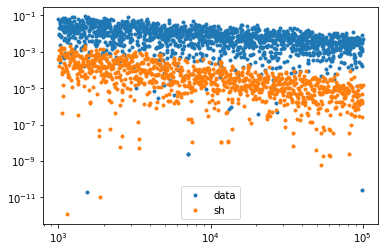

In [104]:
plt.figure()
plt.loglog(nDataLst, rezLst, '.', label='data')
plt.loglog(nDataLst, rezSh, '.', label='sh')
plt.legend()
plt.show()